# Loading libraries


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import seaborn as sns
import seaborn as sns
from sklearn.cluster import KMeans

# Plotting

In [ ]:
merged_data_short = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/merged_data_short.csv")

In [ ]:
# Aggregating the available bike stands and total bike stands for each day
demand = filtered_data_short.groupby(filtered_data_short['date'].dt.date)['start_count'].sum()
daily_total_stands = filtered_data_short.groupby(filtered_data_short['date'].dt.date)['capacity'].sum()

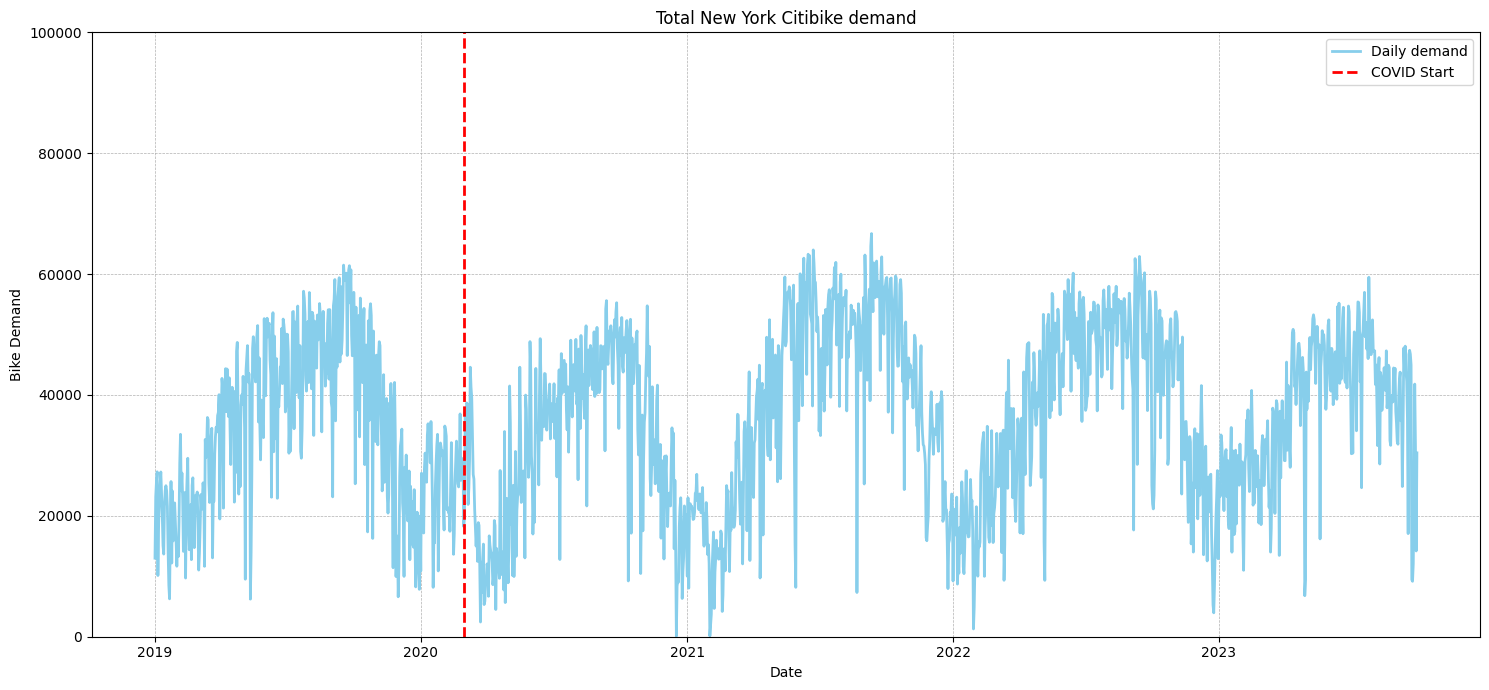

In [ ]:
# Plotting the percentage of available bike stands
plt.figure(figsize=(15, 7))
demand.dropna().plot(color='skyblue', linewidth=2, label='Daily demand')


covid_start = pd.to_datetime('2020-03-01')
plt.axvline(x=covid_start, color='red', linestyle='--', lw=2, label='COVID Start')


plt.title("Total New York Citibike demand")
plt.xlabel("Date")
plt.ylabel("Bike Demand")
plt.ylim(0, 100000)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:
# Extract the week and year from the 'TIME_x' column to help in calculating the number of unique weeks in the dataset
merged_data['WEEK'] = pd.to_datetime(merged_data['date']).dt.week

In [ ]:
# Calculate the total number of bikes rented for each day of the week
total_rented_by_day = merged_data.groupby('day_of_week')['start_count'].sum()

# Divide by the number of unique weeks in the dataset to get the average
num_unique_weeks = merged_data.drop_duplicates(subset=['year', 'WEEK']).shape[0]
average_rented_by_day = total_rented_by_day / num_unique_weeks

# Reordering the days of the week for proper plotting
average_rented_by_day = average_rented_by_day.reindex(ordered_days)

# Plotting the average number of bikes rented for each day of the week
plt.figure(figsize=(10, 5))
average_rented_by_day.plot(kind='bar', color='skyblue')
plt.title('Demand by day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Demand')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

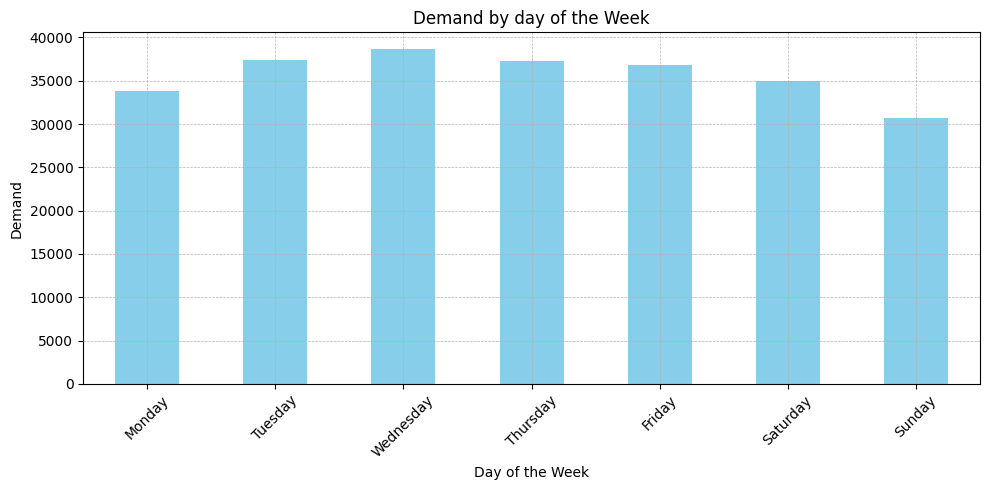

In [ ]:

# Calculate the total number of bikes rented for each day of the week
total_rented_by_day = merged_data.groupby('day_of_week')['start_count'].sum()

# Divide by the number of unique weeks in the dataset to get the average
num_unique_weeks = merged_data.drop_duplicates(subset=['year', 'WEEK']).shape[0]
average_rented_by_day = total_rented_by_day / num_unique_weeks

# Reordering the days of the week for proper plotting
average_rented_by_day = average_rented_by_day.reindex(ordered_days)

# Plotting the average number of bikes rented for each day of the week
plt.figure(figsize=(10, 5))
average_rented_by_day.plot(kind='bar', color='skyblue')
plt.title('Demand by day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Demand')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

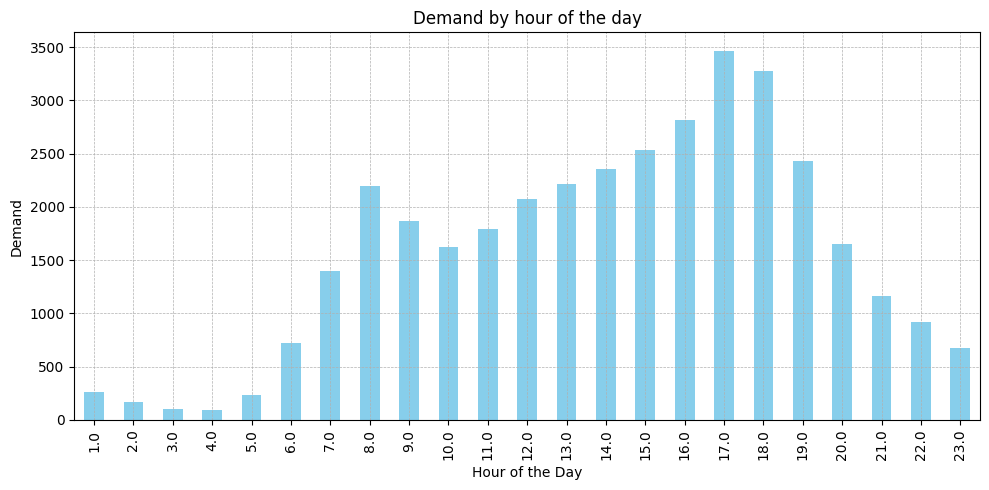

In [ ]:
# Calculate the total number of bikes rented for each hour of the day
total_rented_by_hour = merged_data.groupby('hour')['start_count'].sum()

# Divide by the number of unique days in the dataset to get the average
num_unique_days = merged_data['date'].nunique()
average_rented_by_hour = total_rented_by_hour / num_unique_days

# Plotting the average number of bikes rented for each hour of the day
plt.figure(figsize=(10, 5))
average_rented_by_hour.plot(kind='bar', color='skyblue')
plt.title('Demand by hour of the day')
plt.xlabel('Hour of the Day')
plt.ylabel('Demand')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


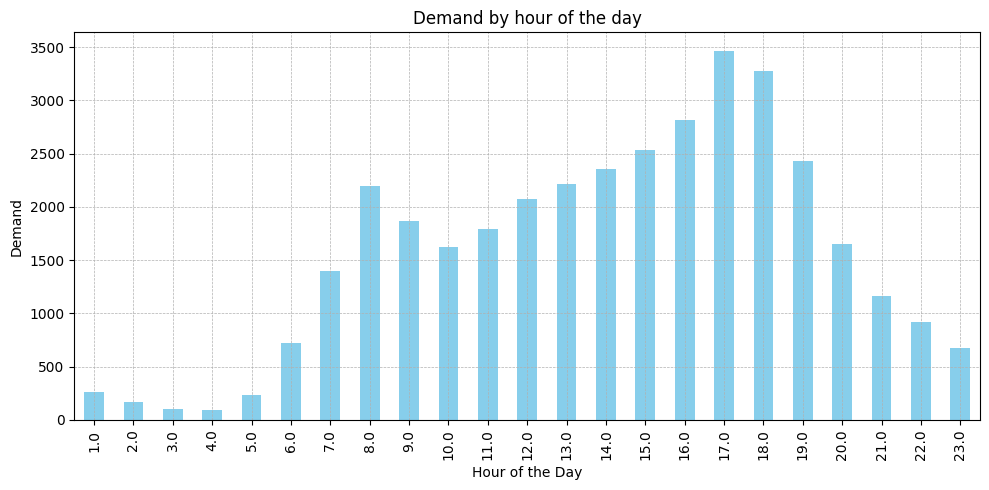

In [ ]:
# Calculate the total number of bikes rented for each hour of the day
total_rented_by_hour = merged_data.groupby('hour')['start_count'].sum()

# Divide by the number of unique days in the dataset to get the average
num_unique_days = merged_data['date'].nunique()
average_rented_by_hour = total_rented_by_hour / num_unique_days

# Plotting the average number of bikes rented for each hour of the day
plt.figure(figsize=(10, 5))
average_rented_by_hour.plot(kind='bar', color='skyblue')
plt.title('Demand by hour of the day')
plt.xlabel('Hour of the Day')
plt.ylabel('Demand')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()


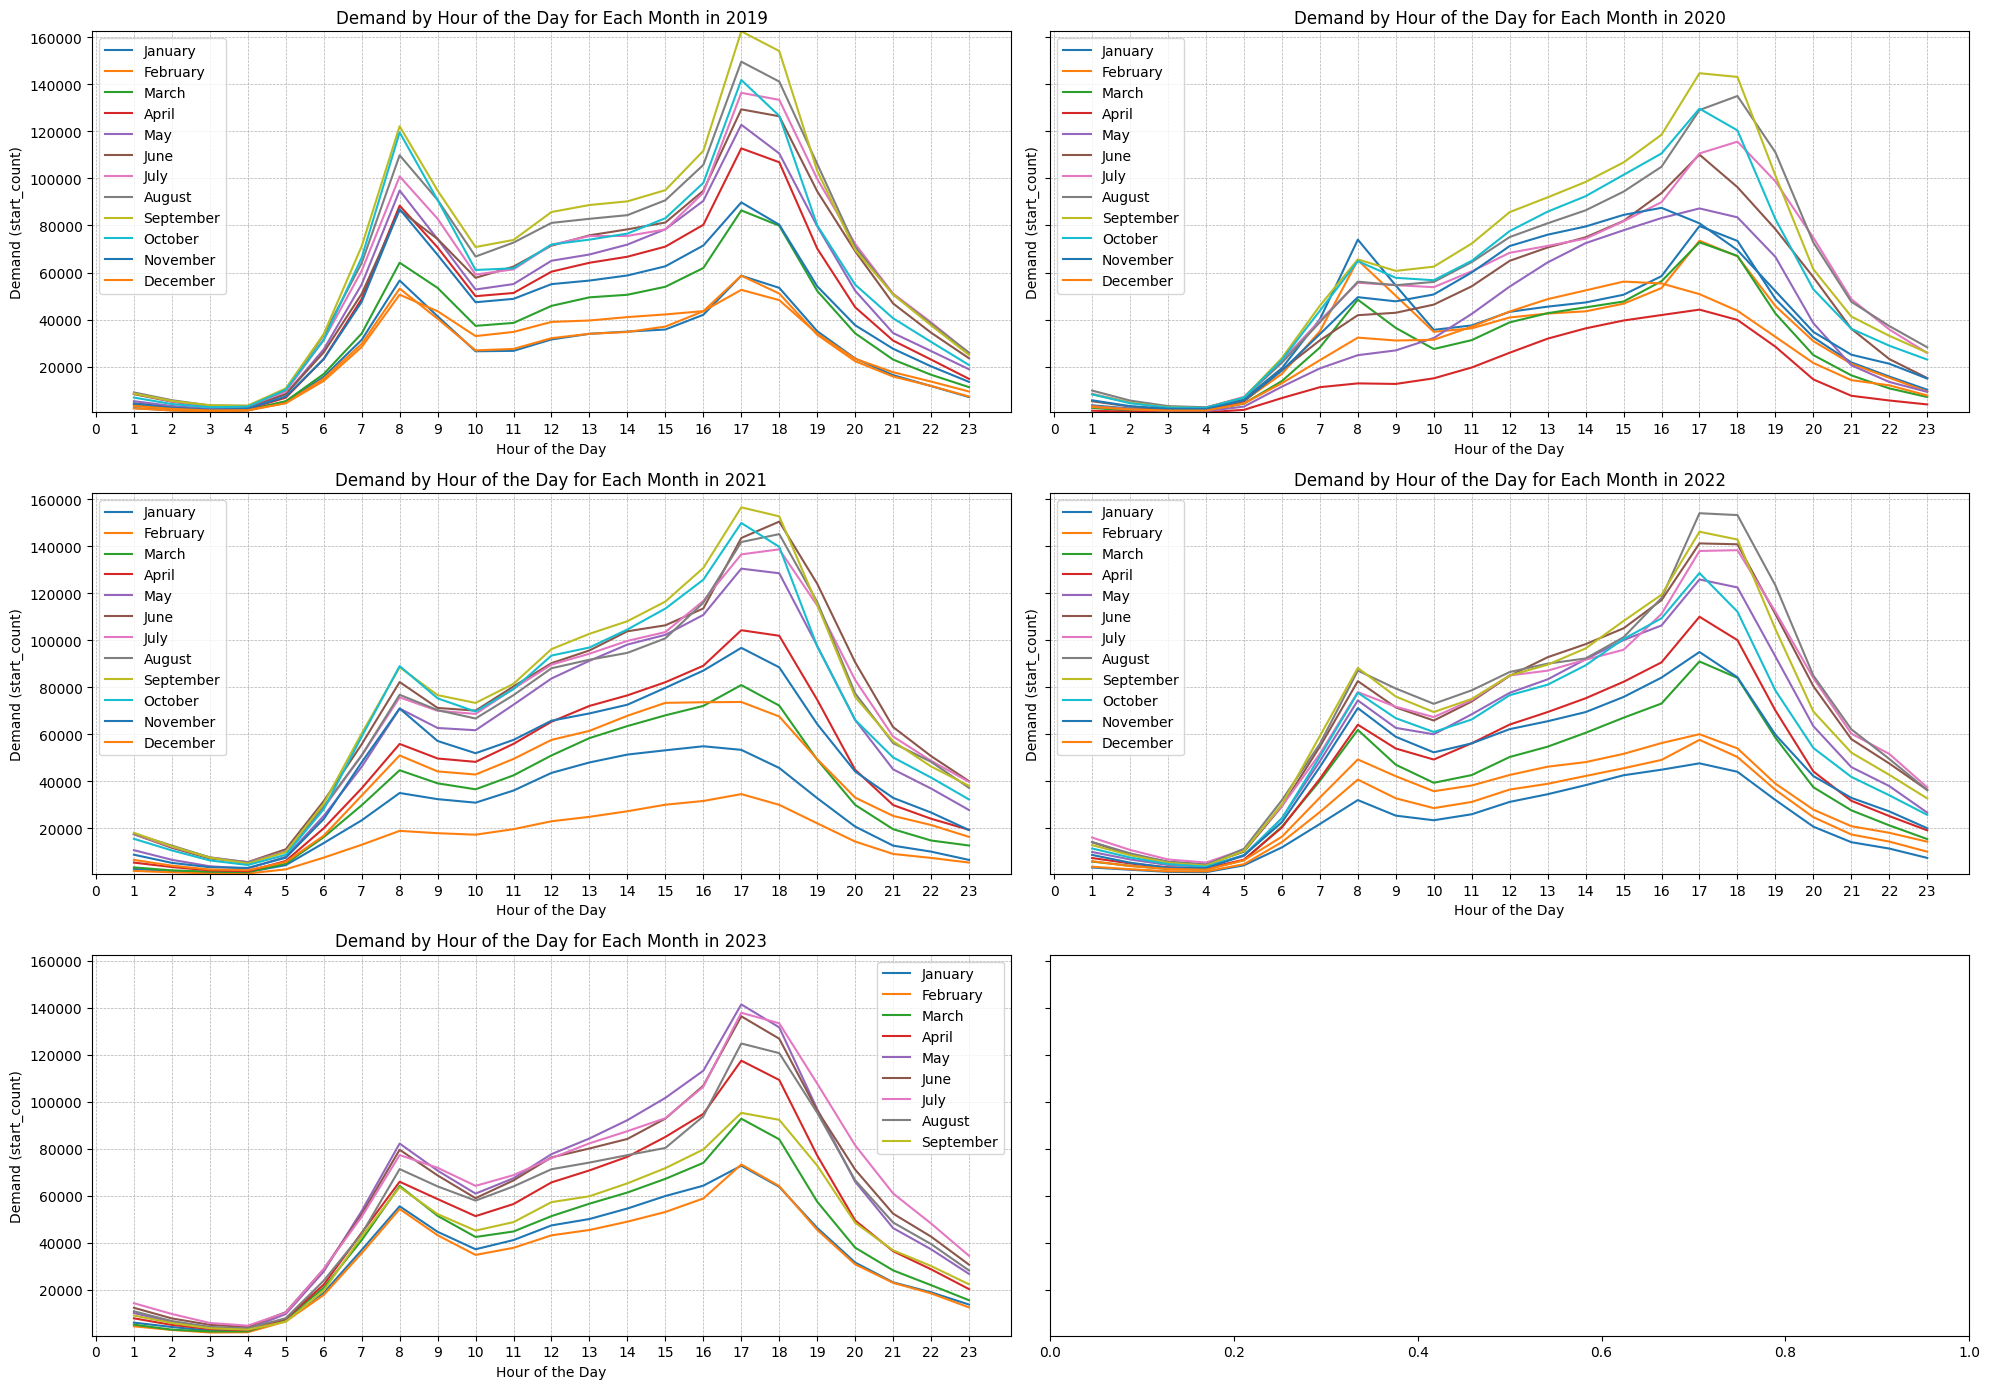

In [ ]:
# Month labels for proper plotting
month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Extract year, month, and hour from the 'day' column
merged_data['month'] = merged_data['date'].dt.month

# Group by year, month, and hour to get the sum of start_count for each hour of each month of each year
grouped_data = merged_data.groupby(['year', 'month', 'hour'])['start_count'].sum().reset_index()
# Determine the global minimum and maximum start_count values
global_min = grouped_data['start_count'].min()
global_max = grouped_data['start_count'].max()

years = grouped_data['year'].unique()

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 14), sharey=True)
axes = axes.ravel()
grouped_data['month'] = grouped_data['month'].apply(lambda x: month_labels[x-1])


for i, year in enumerate(years):
    yearly_data = grouped_data[grouped_data['year'] == year]

    for month in yearly_data['month'].unique():
        monthly_data = yearly_data[yearly_data['month'] == month]
        axes[i].plot(monthly_data['hour'], monthly_data['start_count'], label=month)

    axes[i].set_title(f'Demand by Hour of the Day for Each Month in {year}')
    axes[i].set_xlabel('Hour of the Day')
    axes[i].set_ylabel('Demand (start_count)')
    axes[i].set_xticks(range(24))
    axes[i].set_ylim(global_min, global_max)
    axes[i].legend()
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

# Plotting geographical data

In [ ]:
# Assuming 'station_id' is the column name in both DataFrames that identifies stations
merged_data = merged_df[merged_df['station_id'].isin(unique_stations['station_id'])]


In [ ]:
# Extract unique station locations
unique_stations = merged_data[['latitude', 'longitude', 'station_name']].drop_duplicates("station_name")

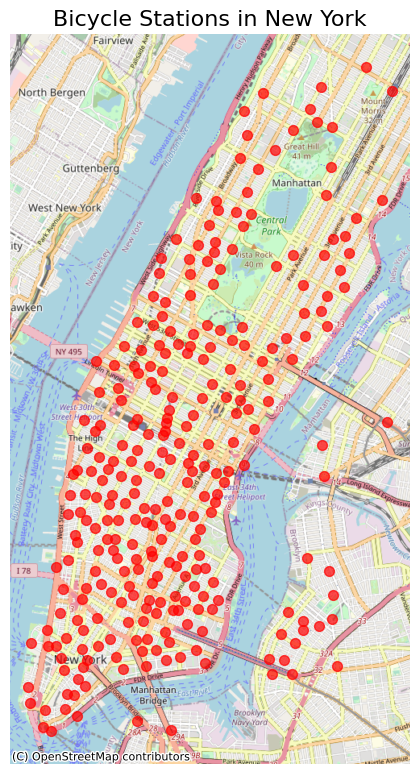

In [ ]:
# Create a GeoDataFrame from the stations data
gdf = gpd.GeoDataFrame(unique_stations, geometry=gpd.points_from_xy(unique_stations.longitude, unique_stations.latitude))

# Set the initial CRS to WGS 84 (EPSG:4326)
gdf.crs = "EPSG:4326"

# Now transform to Web Mercator projection (EPSG:3857) for contextily
gdf = gdf.to_crs(epsg=3857)

# Set up the map
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, markersize=50, color='red', alpha=0.7)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)  # Use OpenStreetMap basemap

ax.set_title("Bicycle Stations in New York", fontsize=16)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.axis('off')

plt.tight_layout()
plt.show()

#Plotting for cluster method

In [ ]:
# Number of clusters
n_clusters = 10

# Extracting the latitude and longitude for clustering
coords = unique_stations[['latitude', 'longitude']].values

# Using KMeans to cluster the data
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(coords)

# Assign the cluster labels to each station
unique_stations['cluster'] = kmeans.labels_

# Create a GeoDataFrame with the cluster assignments
gdf_clustered = gpd.GeoDataFrame(unique_stations, geometry=gpd.points_from_xy(unique_stations.longitude, unique_stations.latitude))
gdf_clustered.crs = "EPSG:4326"
gdf_clustered = gdf_clustered.to_crs(epsg=3857)

# Visualizing the clusters
fig, ax = plt.subplots(figsize=(12, 8))
gdf_clustered.plot(column='cluster', categorical=True, legend=True, ax=ax, markersize=50, cmap='tab10', alpha=0.7)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatter)

ax.set_title(f"Bicycle Stations in Dublin - {n_clusters} Clusters", fontsize=16, color='white')
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='white')
ax.axis('off')
ax.set_facecolor('black')
plt.tight_layout()
plt.show()

In [ ]:
merged_df_with_clusters = pd.merge(merged_data, unique_stations[['station_name', 'cluster']], on=['station_name'], how='left')
only_cluster_1 = merged_df_with_clusters[merged_df_with_clusters["cluster"] == 0]
only_cluster_1["hour"] = only_cluster_1["hour"].astype(int)

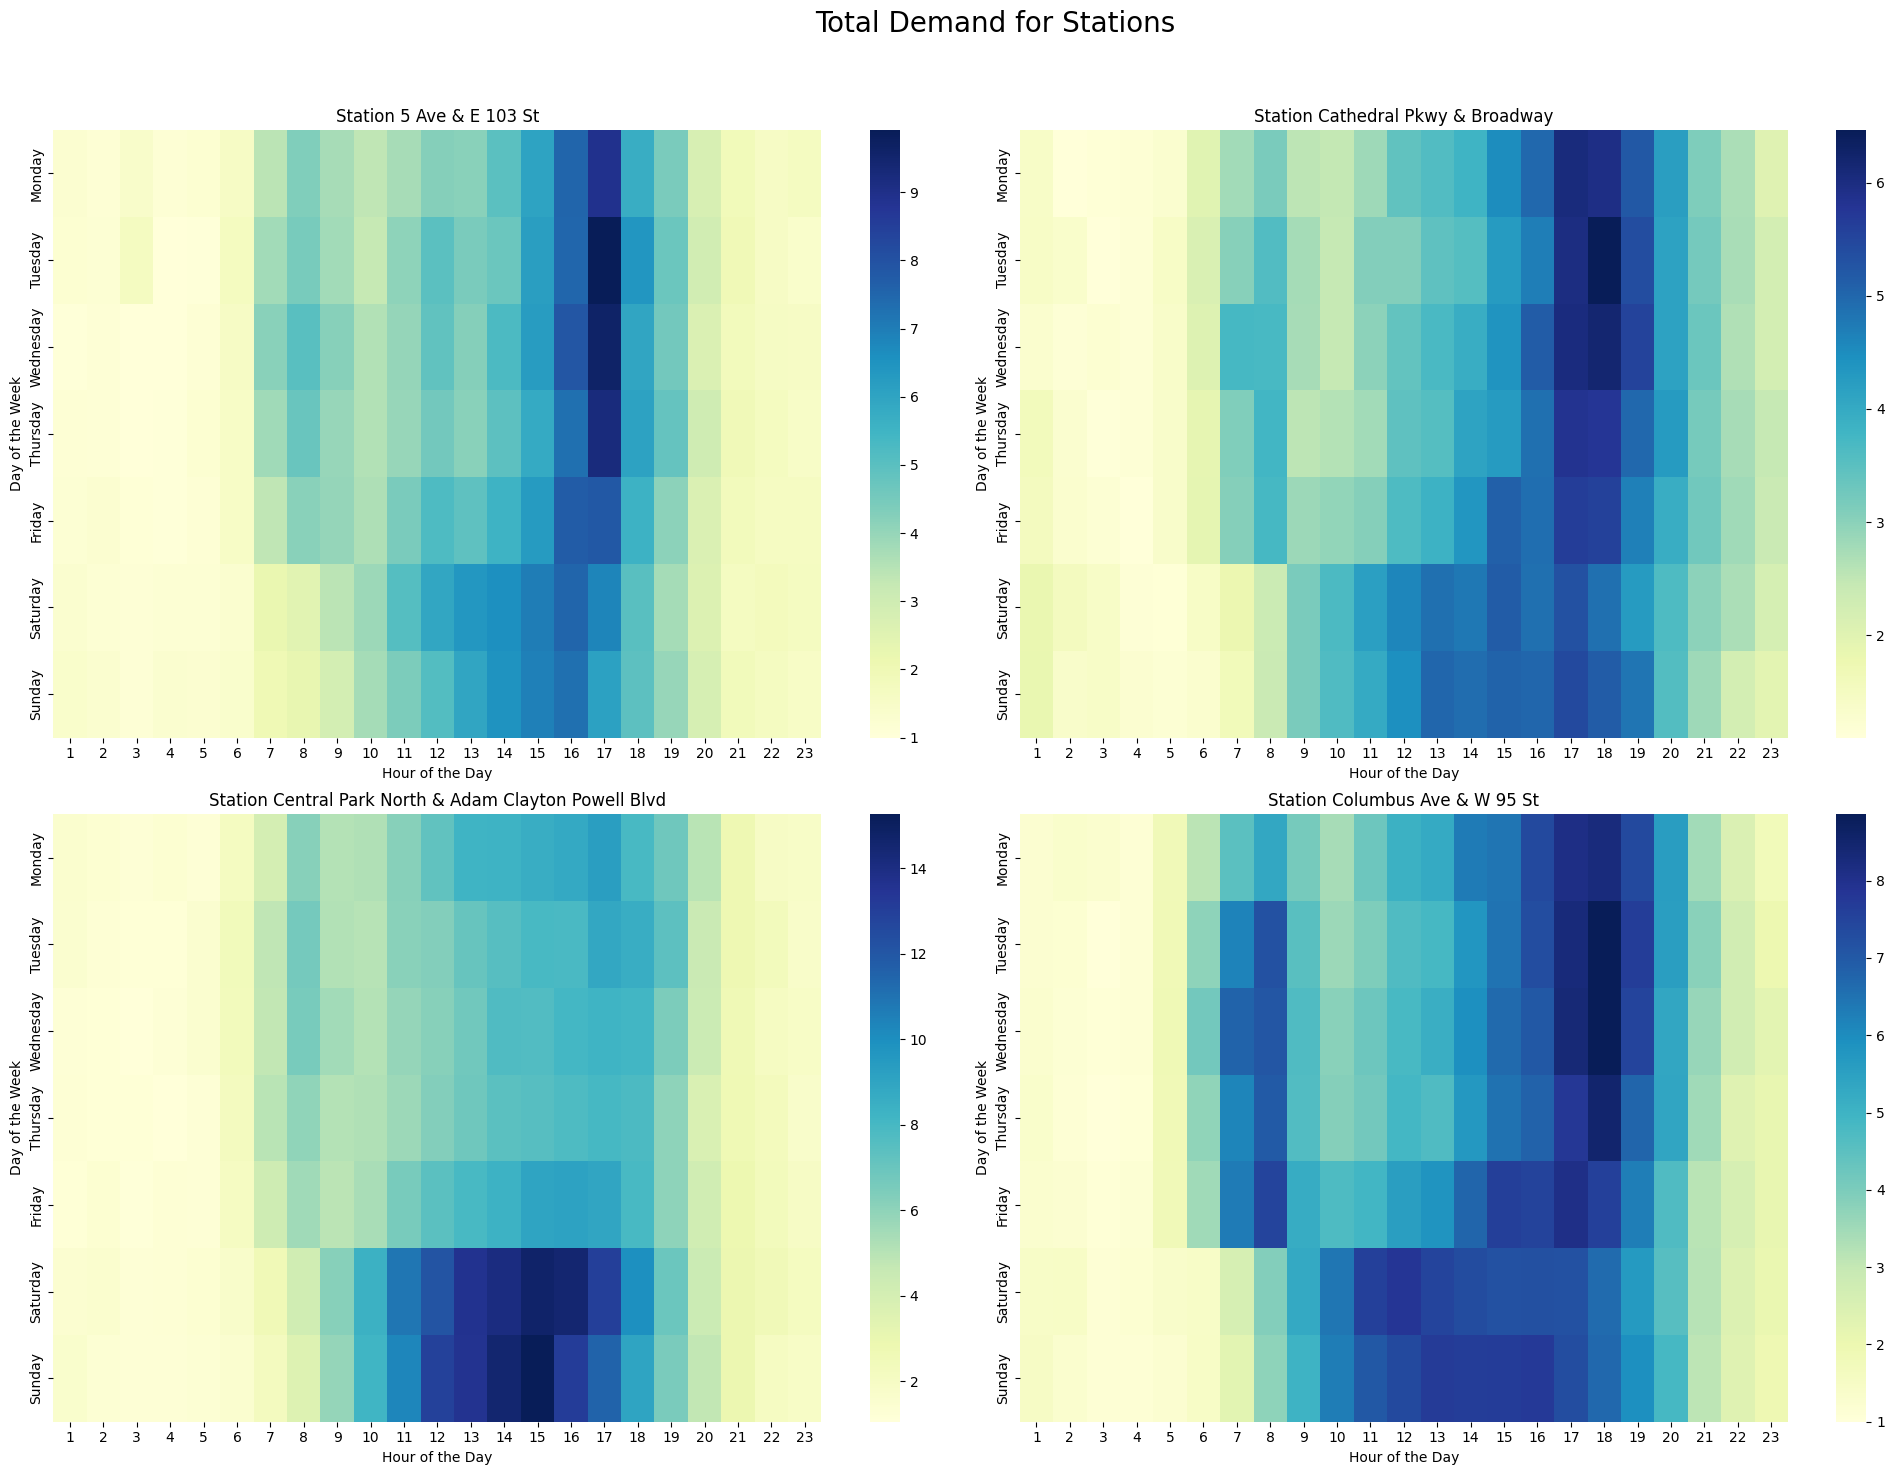

In [ ]:
# Grouping data by station, day of the week, and hour of the day
grouped_by_station_day_hour = only_cluster_1.groupby(['station_name', 'day_of_week', 'hour']).agg({
    'start_count': 'mean'})

# Resetting index for easier manipulation
grouped_by_station_day_hour = grouped_by_station_day_hour.reset_index()

# Creating a pivot table for heatmap
pivot_data = grouped_by_station_day_hour.pivot_table(index=['day_of_week', 'hour'], columns='station_name', values='start_count')

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

pivot_data = pivot_data.reindex(ordered_days, level=0)

num_stations = 4

# Create a figure with a grid for heatmaps
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
fig.suptitle('Total Demand for Stations', fontsize=20)

# Plot heatmaps for the first num_stations stations
for idx, ax in enumerate(axes.ravel()):
    if idx >= len(pivot_data.columns) or idx >= num_stations:
        ax.axis('off')  # Turn off the axis if no data
        continue
    station_name = pivot_data.columns[idx]
    sns.heatmap(pivot_data[station_name].unstack(), cmap="YlGnBu", cbar=True, ax=ax) # Removed vmin and vmax for total demand
    ax.set_title(f'Station {station_name}')
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Day of the Week')

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()
